# Parameter Estimation of ODE Models for Chemical Kinetics

Parameter estimation or curve fitting is the process of finding the coefficients or parameters to fit some model or curve to a set of data. This module covers how to use Python tools for this process.

Author: Dr. Ashlee N. Ford Versypt, ashleefv@buffalo.edu

# Learning Objectives

By the end of this module, students will be able to:

* use Python functions to estimate parameters for models that involve systems of ordinary differential equations (ODE) to describe a chemical kinetics problem from the chemical industry



# Problem Statement

A fluid catalytic cracker or FCC unit (Figure 1) is an industrial process used to convert heavy petroleum refining intermediates into more valuable lighter products via catalytic reactions. The FCC process involves many chemical components and reactions. It is common to gather sets of component chemical species by molecular weight into subgroups referred to as "lumps" instead of considering each component explicitly. 

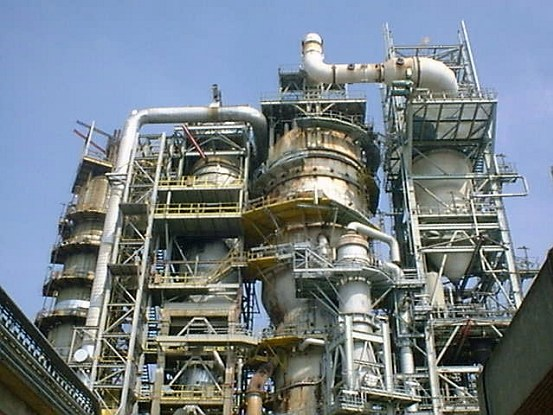

*Figure 1: Fluid catalytic cracker or FCC unit*

Two of the most common kinetic models for the process are called the **three-lump model** and the **four-lump model**.

### Three-lump model

The three-lump model involves three subgroups: VGO ($y_1$), gasoline ($y_2$), and the sum of gas and coke ($y_3$). The reaction network for the three-lump model is shown in Figure 2. The ODEs that define the three-lump model are 

$$\frac{dy_1}{dt} = -(k_1+k_3)y_1^2$$
 
$$\frac{dy_2}{dt} = k_1y_1^2-k_2y_2$$

$$\frac{dy_3}{dt} = k_3y_1^2+k_2y_2$$

where $k_1$, $k_2$, and $k_3$ are the parameters, and $y_i$ denotes the weight fraction of lump $i$. Conversion is defined as $1-y_1$. Note that the initial conditions are $y_1(0) = 1$, $y_2(0) = 0$, and $y_3(0) = 0$. 

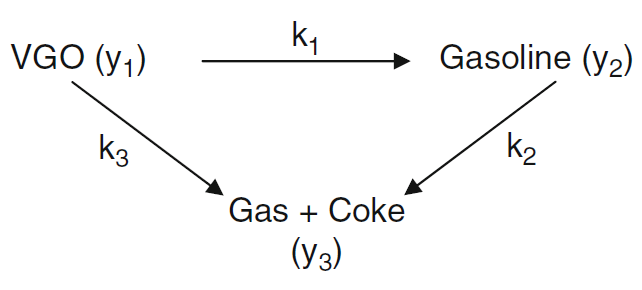

*Figure 2: Three-lump model reaction network*

### Four-lump model

The four-lump model involves four subgroups: VGO ($y_1$), gasoline ($y_2$), gas ($y_3$), and coke ($y_4$). The reaction network for the four-lump model is shown in Figure 3. The ODEs that define the three-lump model are 
$$\frac{dy_1}{dt} = -(k_{12}+k_{13}+k_{14})y_1^2$$

$$\frac{dy_2}{dt} = k_{12}y_1^2-k_{23}y_2-k_{24}y_2$$

$$\frac{dy_3}{dt} = k_{13}y_1^2+k_{23}y_2$$

$$\frac{dy_4}{dt} = k_{14}y_1^2+k_{24}y_2$$

where $k_{12}$, $k_{13}$, $k_{14}$, $k_{23}$, and $k_{24}$ are the parameters, and $y_i$ represents the weight fraction of lump $i$. Conversion is defined as $1-y_1$. Note that the initial conditions are $y_1(0) = 1$, $y_2(0) = 0$, $y_3(0) = 0$,  and $y_4(0) = 0$.

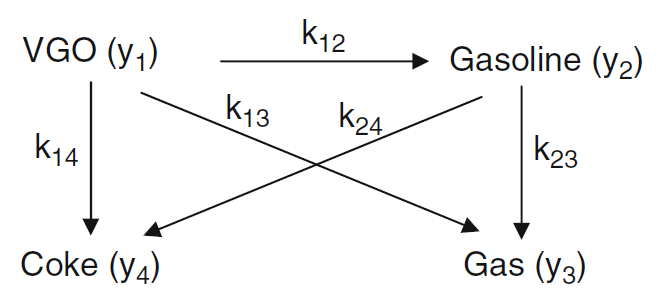

*Figure 3: Four-lump model reaction network*

### Data
The following data have been reported in the literature and converted to a convenient form for use here.

| Time (h) | Conversion | VGO | Gasoline | Gas | Coke |
| -------- | ---------- | --- | -------- | ----| ---- |
|1/60 | 0.4926 | 0.5074 | 0.3767 | 0.0885 | 0.0274|
|1/30 | 0.6204 | 0.3796 |0.4385 | 0.1360  | 0.0459|
|1/20| 0.7118 | 0.2882 | 0.4865 | 0.1681 | 0.0572|
|1/10 | 0.8238 | 0.1762 | 0.5416 | 0.2108 | 0.0714|



### Expected results

The fitted parameters should yield predicted curves that agree with Figures 4 and 5. Some slight deviations are allowable as the parameter estimation procedures in Python differ from those used in the original work. 

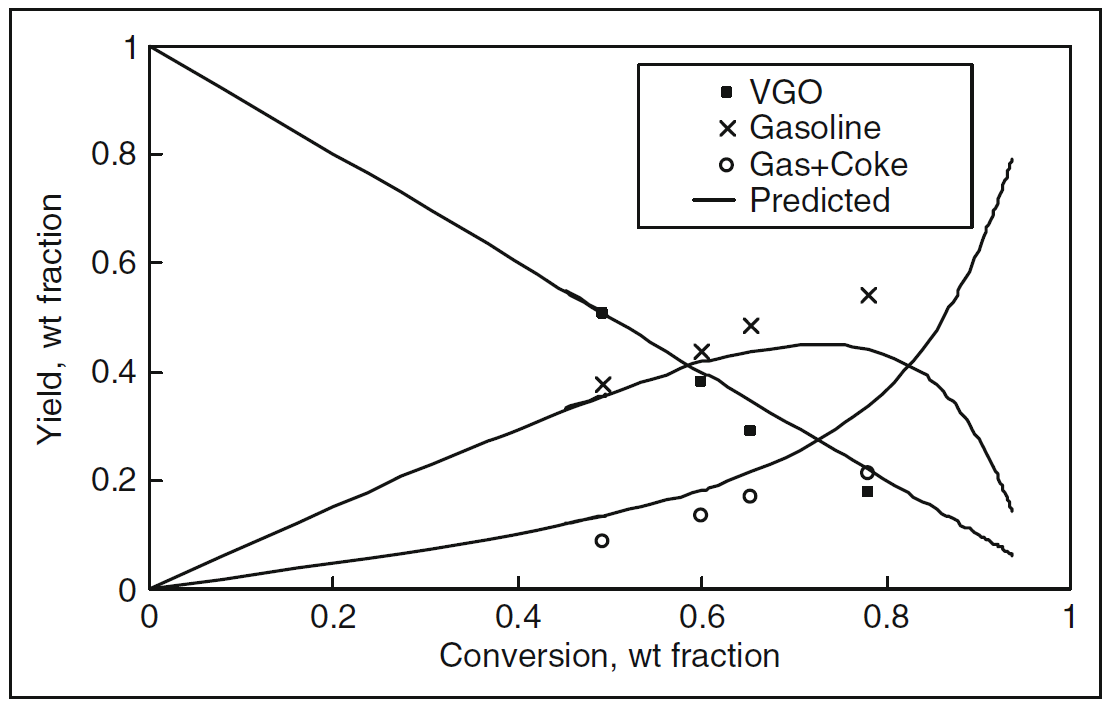

*Figure 4: Data and fitted curve solution for three-lump model*

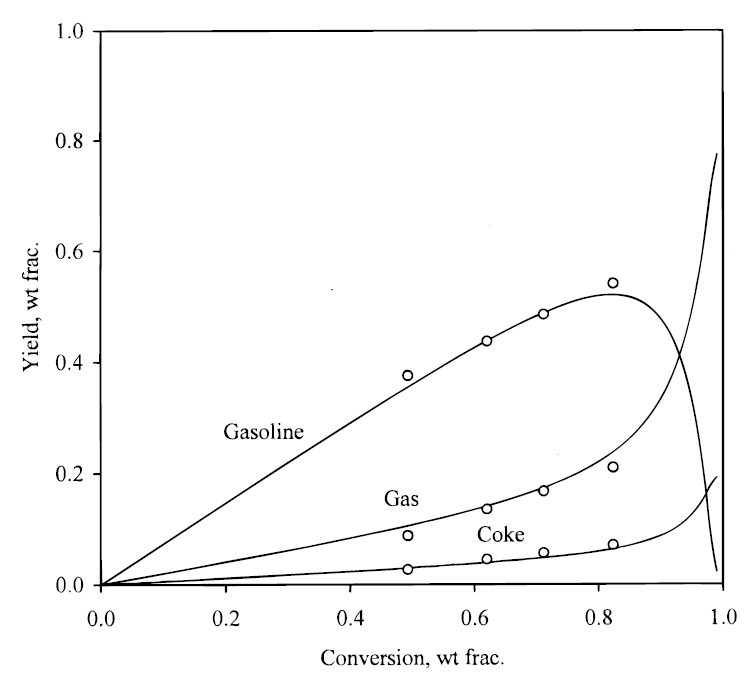

*Figure 5: Data and fitted curve solution for four-lump model*

# Solution

The following packages are needed for parameter estimation, solving ODE models, and plotting results.

In [1]:
#import needed stuff
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Define the system of ODEs for the three-lump model

$$\frac{dy_1}{dt} = -(k_1+k_3)y_1^2$$
 
$$\frac{dy_2}{dt} = k_1y_1^2-k_2y_2$$

$$\frac{dy_3}{dt} = k_3y_1^2+k_2y_2$$

with parameters $k_1$, $k_2$, and $k_3$

In [2]:
#Function to define ODEs used by model function in parameter estimation
def ODEs_3lump(y,t,parameters):
    #unpack inputs into variable names
    k1 = parameters[0]
    k2 = parameters[1]
    k3 = parameters[2]
    
    y1 = y[0] # VGO
    y2 = y[1] # Gasoline
    y3 = y[2] # Gas + Coke
    
    #define equations for three-lump model
    dy1_dt = -(k1 + k3)*y1**2 #eq 1
    dy2_dt = k1*y1**2-k2*y2 #eq 2
    dy3_dt = k3*y1**2+k2*y2 #eq 3
    
    #return output
    return dy1_dt, dy2_dt, dy3_dt

### Define model for parameter estimation

NEED TO UPDATE FROM HERE: While this function itself takes no inputs, the nested functions and the curve fitting function need inputs of time data, weight fraction data for
each lump, and initial parameter guesses. These inputs are defined in the function and are sourced from the assignment document.

The function outputs two plots and a few return values. The first plot, *Figure 1*, shows the weight fraction of each lump over time since the reaction process began. *Figure 2* shows the weight fraction of each lump at different points of conversion (conversion is defined as the amount of VGO used up in the reaction). The return values are the optimal guesses for each parameter and the covariance array from the curve fitting process.

In [3]:
#Function to solve ODEs for parameter estimation
def model(xaxisdata,*params):
    #initial conditions for the ODEs
    yaxis0 = np.array([1.0,0.0,0.0])
    numYaxisVariables = 3
    yaxisCalc = np.zeros((xaxisData.size,numYaxisVariables))
    
    for i in np.arange(0,len(xaxisdata)): #loop iterates over each entry of time to check solved value at that time point
        if xaxisdata[i] == 0.0: #if true, output initial condition as answer
            yaxisCalc[i,:] = yaxis0
        else: #if false, solve ODE up to point of t and give solution at t as answer
            xaxisSpan = np.linspace(0.0,xaxisData[i],101)
            ySoln = odeint(ODEs_3lump,yaxis0,xaxisSpan,args = (params,))
            yaxisCalc[i,:] = ySoln[-1,:]
    #format output for curve_fit
    yaxisOutput = np.transpose(yaxisCalc)
    yaxisOutput = np.ravel(yaxisOutput)
    return yaxisOutput

In [4]:
#data needed for parameter estimation

#input data from table 1. Unitless unless otherwise specified
xaxisData = np.array([1/60,1/30,1/20,1/10]) #units of hours
conversion = np.array([0.4926,0.6204,0.7118,0.8238])
yaxisData = np.array([[0.5074,0.3796,0.2882,0.1762], [0.3767,0.4385,0.4865,0.5416], [0.0885+0.0274,0.1360+0.0459,0.1681+0.0572,0.2108+0.0714]])


#parameter guesses. Start with all at 1 as a rule of thumb
k1guess = 1
k2guess = 1
k3guess = 1
#pack guesses together for usage in curve fitting
parameterguesses = np.array([k1guess, k2guess, k3guess])

In [5]:
#running curve_fit and printing outputs

#Parameter Estimation
parametersoln, pcov = curve_fit(model,xaxisData,np.ravel(yaxisData),p0=parameterguesses)

#Print outputs to Command Window
print('Parameter values:')
for i in range(len(parametersoln)):
    print('k_'+str(int(i+1)),'=','%.4f'%parametersoln[i])
print('\n')
print('Covariance array:')
print(pcov)

Parameter values:
k_1 = 38.8664
k_2 = 1.8439
k_3 = 13.2322


Covariance array:
[[ 2.96922223  0.49220859 -0.35005335]
 [ 0.49220859  0.35896703 -0.6383415 ]
 [-0.35005335 -0.6383415   1.8687553 ]]


In [6]:
#set up plotting values
yaxis0 = np.array([1.0,0.0,0.0])
numYaxisVariables = 3
timeaxisForPlotting = np.linspace(0.001,1,100)
yatsoln = odeint(ODEs_3lump,yaxis0,timeaxisForPlotting,args = (parametersoln,))
conversionaxisForPlotting = np.subtract(1.0,yatsoln[:,0])

<function matplotlib.pyplot.show(close=None, block=None)>

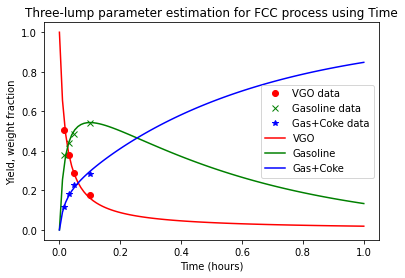

In [7]:
#Figure 1: y_i and time
plt.figure(6)
plt.plot(xaxisData, yaxisData[0,:],'ro', label='VGO data')
plt.plot(xaxisData, yaxisData[1,:],'gx', label='Gasoline data')
plt.plot(xaxisData, yaxisData[2,:],'b*', label='Gas+Coke data')
plt.plot(timeaxisForPlotting, yatsoln[:,0], 'r', label='VGO')
plt.plot(timeaxisForPlotting, yatsoln[:,1], 'g', label='Gasoline')
plt.plot(timeaxisForPlotting, yatsoln[:,2], 'b', label='Gas+Coke')
#title, axis labels, legend
plt.title('Three-lump parameter estimation for FCC process using Time')
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Yield, weight fraction')
plt.show

*Figure 6: Three-lump parameter estimation using time as the independent variable*

<function matplotlib.pyplot.show(close=None, block=None)>

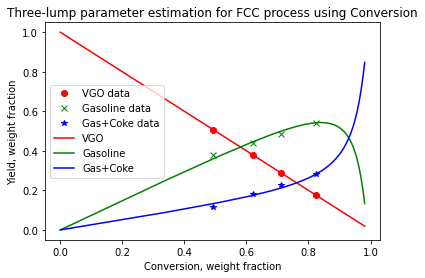

In [8]:
#Figure 2: y_i and conversion
plt.figure(7)
plt.plot(conversion, yaxisData[0,:],'ro', label='VGO data')
plt.plot(conversion, yaxisData[1,:],'gx', label='Gasoline data')
plt.plot(conversion, yaxisData[2,:],'b*', label='Gas+Coke data')
plt.plot(conversionaxisForPlotting, yatsoln[:,0], 'r', label='VGO')
plt.plot(conversionaxisForPlotting, yatsoln[:,1], 'g', label='Gasoline')
plt.plot(conversionaxisForPlotting, yatsoln[:,2], 'b', label='Gas+Coke')
#title, axis labels, legend
plt.title('Three-lump parameter estimation for FCC process using Conversion')
plt.legend()
plt.xlabel('Conversion, weight fraction')
plt.ylabel('Yield, weight fraction')
plt.show

*Figure 7: Three-lump parameter estimation using conversion of VGO as the independent variable*